Analysis of AB interaction with memory

In [73]:
#set up the environment
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from os import walk,getcwd
import matplotlib.pyplot as plt
#custom helper functions for reading in data files and performing key analysis steps
%run AB_mem_helper_funcs.py
curwd = getcwd()
mypath = "data"
pd.options.mode.chained_assignment = None  # default='warn'

<Figure size 432x288 with 0 Axes>

In [74]:
#find the data file paths
dataFiles = list(walk(mypath))[0][2]
dataFiles = Series([curwd + '\\' + mypath +'\\'+ file for file in dataFiles])


In [75]:
dataFiles

0     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
1     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
2     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
3     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
4     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
5     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
6     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
7     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
8     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
9     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
10    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
11    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
12    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
13    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
14    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
15    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
16    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
17    C:\Users\User\OneDrive\Documents\GitHub\AB

In [76]:
#find all the relevant summary stats for each data file
allDat = dataFiles.map(readDataFile)

C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ou

C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ou

In [77]:
DataFrame(allDat[4])


,2022-06-29_10h58.31.945
Lag5_T1P_T2A_T1,0.750000
Lag5_T1P_T2A_T2,0.928571
Lag5_T1P_T2A_T2_T1,0.904762
Lag1_T1P_T2P_T1,0.919540
Lag1_T1P_T2P_T2,0.908046
Lag1_T1P_T2P_T2_T1,0.912500
Lag5_T1P_T2P_T1,0.930233
Lag5_T1P_T2P_T2,0.860465
Lag5_T1P_T2P_T2_T1,0.850000
Lag5_T1A_T2A_T1,1.000000


In [78]:
#aggregate the summaries into a dataframe
df = DataFrame()
for row in allDat: 
    df = df.add(DataFrame(row), fill_value = 0)
df = df.T

In [79]:
df

,ABT1overall,ABT2overall,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,...,PP1blink_mem,PP1cor_mem,PP1miss_mem,PP5cor_mem,T1Overall,T2Overall,distMem,distracter_mem,novel_mem,targMem
2022-06-28_15h27.56.947,0.797386,0.767974,1.0,1.0,1.000000,1.000000,0.678571,0.678571,0.857143,0.892857,...,0.625000,0.622222,0.000000,0.593750,0.598131,0.520833,0.780591,0.403846,0.886486,0.754153
2022-06-28_16h39.33.399,0.921569,0.722222,1.0,1.0,1.000000,0.964286,0.678571,0.703704,0.857143,0.928571,...,0.688889,0.513514,NaN,0.648649,0.611111,0.542169,0.852321,0.634615,0.913514,0.794118
2022-06-29_09h00.40.945,0.826797,0.794118,0.8,0.6,0.500000,0.714286,0.892857,0.850000,0.750000,0.357143,...,0.800000,0.671429,0.500000,0.465116,0.611570,0.592000,0.827004,0.903846,0.805405,0.717949
2022-06-29_10h01.10.225,0.879085,0.692810,0.9,1.0,1.000000,1.000000,0.500000,0.500000,0.821429,0.928571,...,0.777778,0.720000,0.000000,0.714286,0.739496,0.701149,0.810127,0.461538,0.908108,0.835017
2022-06-29_10h58.31.945,0.918301,0.869281,1.0,0.9,0.900000,0.964286,0.928571,0.925926,0.892857,0.821429,...,0.428571,0.338028,0.000000,0.444444,0.382114,0.355932,0.852321,0.480769,0.956757,0.724590
2022-06-29_12h25.08.771,0.852941,0.820261,0.9,1.0,1.000000,0.892857,0.750000,0.760000,0.750000,0.892857,...,0.724138,0.761905,0.333333,0.871795,0.778761,0.747475,0.738397,0.788462,0.724324,0.737013
2022-06-29_13h55.44.897,0.859477,0.702614,0.9,0.4,0.444444,0.964286,0.857143,0.851852,0.785714,0.571429,...,0.640000,0.596154,0.000000,0.593750,0.617391,0.549020,0.763713,0.365385,0.875676,0.764120
2022-06-29_16h26.54.527,0.803922,0.627451,0.9,0.8,0.777778,0.928571,0.571429,0.576923,0.678571,0.857143,...,0.756098,0.562500,0.000000,0.545455,0.611111,0.534247,0.835443,0.596154,0.902703,0.797251
2022-06-30_09h08.37.319,0.084967,0.179739,0.0,0.1,NaN,0.035714,0.214286,0.000000,0.142857,0.035714,...,0.000000,0.000000,0.491228,0.000000,0.000000,0.529412,0.873418,0.576923,0.956757,0.797794
2022-06-30_10h36.41.165,0.921569,0.790850,1.0,1.0,1.000000,1.000000,0.821429,0.821429,0.892857,0.964286,...,0.840000,0.592593,NaN,0.692308,0.685484,0.603960,0.789030,0.576923,0.848649,0.772727


In [80]:
df['blinkMag'] = df['Lag5_T1P_T2P_T2_T1'] - df['Lag1_T1P_T2P_T2_T1']
df.to_csv(r'test.csv')

Data cleaning:
1) Participants must have at least .2 for Overall T1 % correct.
2) Participants must have at least .4 of novel images correctly rejected in the mem phase of the study.
3) Participants must have at least .4 for T2 % correct at lag5 on trials where both T1 and T2 were present.
Participants failing these criteria are likely to have been unfocused throughout the task or misunderstood the instructions.


In [105]:
#implement criterion 1:
df = df.loc[df['ABT1overall']>.2, :]
#implement criterion 2:
df = df.loc[df['novel_mem']>.4, :]
#implement criterion 3:
df = df.loc[df['Lag5_T1P_T2P_T2']>.4, :]

(array([ 4.,  2.,  7., 10.,  8.,  9.,  4.,  2.,  1.,  1.]),
 array([-0.0625    ,  0.00486111,  0.07222222,  0.13958333,  0.20694444,
         0.27430556,  0.34166667,  0.40902778,  0.47638889,  0.54375   ,
         0.61111111]),
 <BarContainer object of 10 artists>)

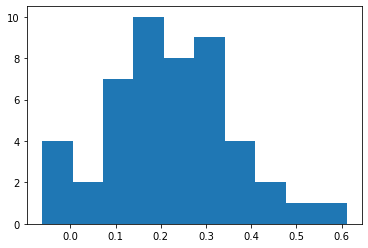

In [106]:
#Use this
#how big is the attentional blink we observe? 
plt.hist(df['blinkMag'])

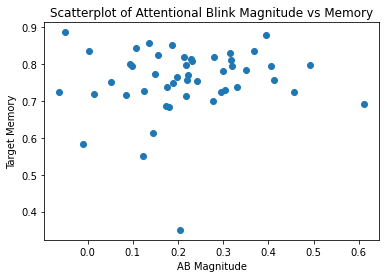

In [107]:
#Use this
#does a bigger attentional blink (worse performance) lead to better memory on a subject level? 
plt.scatter(df['blinkMag'], df['targMem'])
plt.xlabel('AB Magnitude')
plt.ylabel('Target Memory')
plt.title('Scatterplot of Attentional Blink Magnitude vs Memory')
plt.show()

(array([2., 1., 3., 4., 7., 4., 9., 8., 6., 4.]),
 array([-0.21256039, -0.16526268, -0.11796498, -0.07066727, -0.02336957,
         0.02392814,  0.07122585,  0.11852355,  0.16582126,  0.21311896,
         0.26041667]),
 <BarContainer object of 10 artists>)

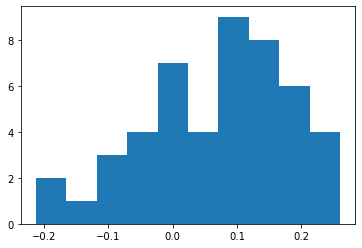

In [108]:
#Use this
#does spending more time (and causing an attentional blink) on T1 lead to better memory on an item level? 
#do a t test on this difference score
plt.hist(df['PP1blink_mem'] - df['PP1cor_mem'])

(array([ 2.,  0.,  2.,  2.,  5., 10., 11.,  8.,  4.,  4.]),
 array([0.18181818, 0.25081585, 0.31981352, 0.38881119, 0.45780886,
        0.52680653, 0.5958042 , 0.66480186, 0.73379953, 0.8027972 ,
        0.87179487]),
 <BarContainer object of 10 artists>)

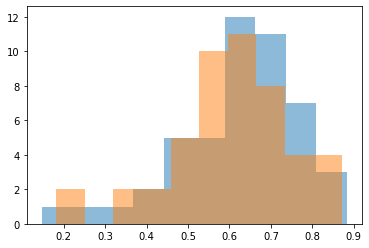

In [109]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(df['PP1cor_mem'], alpha=0.5)



plt.hist(df['PP5cor_mem'], alpha=0.5)


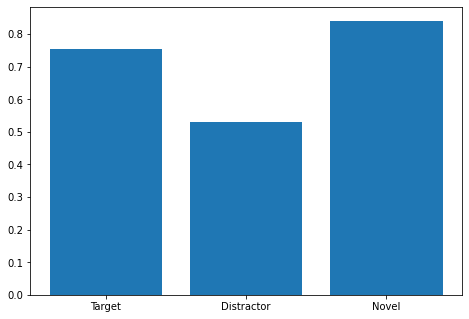

In [110]:
#use this
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
plt.show()

In [111]:
ColumnMeans = df.apply(np.mean)

In [112]:
ColumnMeans[Memory]

targMem           0.754746
distracter_mem    0.530449
novel_mem         0.841329
dtype: float64

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.10399347, 0.20399347, 0.30399347, 0.40399347, 0.50399347,
        0.60399347, 0.70399347, 0.80399347, 0.90399347, 1.00399347,
        1.10399347]),
 <BarContainer object of 10 artists>)

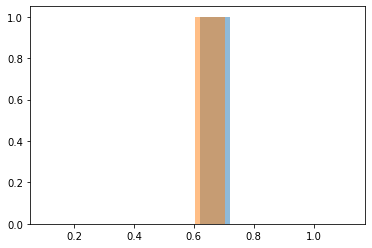

In [113]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['PP1cor_mem'], alpha=0.5)



plt.hist(ColumnMeans['PP5cor_mem'], alpha=0.5)




(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.26606552, 0.36606552, 0.46606552, 0.56606552, 0.66606552,
        0.76606552, 0.86606552, 0.96606552, 1.06606552, 1.16606552,
        1.26606552]),
 <BarContainer object of 10 artists>)

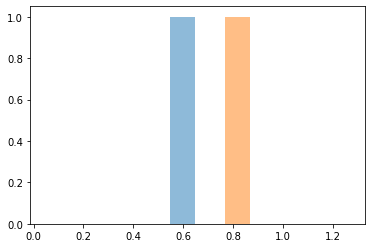

In [114]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['Lag1_T1P_T2P_T2_T1'], alpha=0.5)



plt.hist(ColumnMeans['Lag5_T1P_T2P_T2_T1'], alpha=0.5)




(array([ 2.,  2.,  1.,  0.,  5.,  6.,  6., 12., 11.,  3.]),
 array([0.24444444, 0.31285714, 0.38126984, 0.44968254, 0.51809524,
        0.58650794, 0.65492063, 0.72333333, 0.79174603, 0.86015873,
        0.92857143]),
 <BarContainer object of 10 artists>)

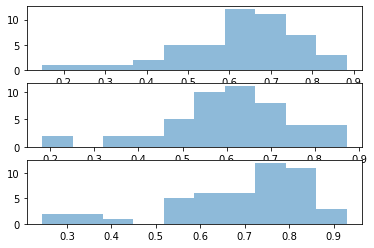

In [115]:
#use 1 and 3
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
plt.hist(df['PP1cor_mem'], alpha=0.5)
ax2 = fig.add_subplot(3,1,2)
plt.hist(df['PP5cor_mem'], alpha=0.5)
ax3 = fig.add_subplot(3,1,3)
plt.hist(df['PP1blink_mem'], alpha=0.5)


In [116]:
df.loc[df['PP1blink_mem']<0.5,:]

,ABT1overall,ABT2overall,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,...,PP1cor_mem,PP1miss_mem,PP5cor_mem,T1Overall,T2Overall,distMem,distracter_mem,novel_mem,targMem,blinkMag
2022-06-29_10h58.31.945,0.918301,0.869281,1.0,0.9,0.900000,0.964286,0.928571,0.925926,0.892857,0.821429,...,0.338028,0.000000,0.444444,0.382114,0.355932,0.852321,0.480769,0.956757,0.724590,-0.062500
2022-07-01_17h04.12.064,0.862745,0.611111,1.0,0.6,0.600000,1.000000,0.642857,0.642857,0.821429,0.857143,...,0.222222,0.200000,0.200000,0.227273,0.173913,0.801688,0.134615,0.989189,0.700680,0.277992
2022-07-04_13h57.02.679,0.875817,0.565359,0.9,1.0,1.000000,1.000000,0.321429,0.321429,0.821429,0.928571,...,0.392857,0.000000,0.333333,0.370690,0.343750,0.797468,0.442308,0.897297,0.685811,0.174253
2022-07-06_10h02.29.464,0.784314,0.637255,0.9,0.9,0.888889,1.000000,0.571429,0.571429,0.642857,0.928571,...,0.148148,0.200000,0.181818,0.238095,0.202899,0.392405,0.346154,0.405405,0.350515,0.203578
2022-07-08_10h00.24.019,0.803922,0.683007,0.8,0.3,0.250000,0.785714,0.464286,0.454545,0.821429,0.428571,...,0.446429,0.333333,0.593750,0.451327,0.475728,0.569620,0.403846,0.616216,0.551495,0.122556


(array([ 2.,  0.,  2.,  2.,  5., 10., 11.,  8.,  4.,  4.]),
 array([0.18181818, 0.25081585, 0.31981352, 0.38881119, 0.45780886,
        0.52680653, 0.5958042 , 0.66480186, 0.73379953, 0.8027972 ,
        0.87179487]),
 <BarContainer object of 10 artists>)

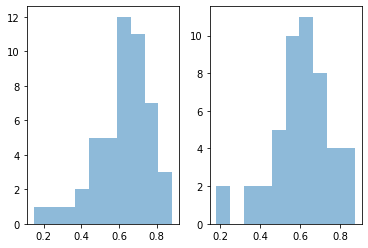

In [117]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.hist(df['PP1cor_mem'], alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
plt.hist(df['PP5cor_mem'], alpha=0.5)


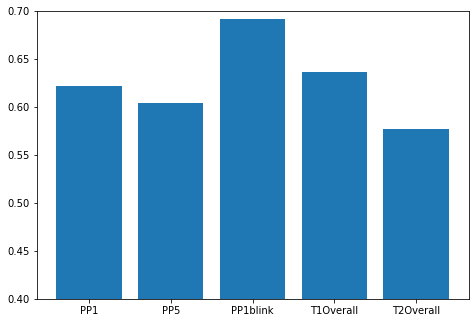

In [118]:
ColumnMeans = df.apply(np.mean)
ColumnSD = df.apply(np.std)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['PP1', 'PP5', 'PP1blink', 'T1Overall', 'T2Overall']
CorMem = ['PP1cor_mem', 'PP5cor_mem', 'PP1blink_mem', 'T1Overall', 'T2Overall']
ax.bar(section,ColumnMeans[CorMem])
plt.ylim([0.4,0.7])
plt.show()

In [119]:
ColumnSD

ABT1overall           0.044152
ABT2overall           0.089894
Lag1_T1A_T2A_T1       0.053845
Lag1_T1A_T2A_T2       0.177939
Lag1_T1A_T2A_T2_T1    0.184163
Lag1_T1A_T2P_T1       0.062695
Lag1_T1A_T2P_T2       0.179053
Lag1_T1A_T2P_T2_T1    0.180184
Lag1_T1P_T2A_T1       0.082142
Lag1_T1P_T2A_T2       0.133827
Lag1_T1P_T2A_T2_T1    0.144814
Lag1_T1P_T2P_T1       0.048170
Lag1_T1P_T2P_T2       0.163885
Lag1_T1P_T2P_T2_T1    0.172757
Lag5_T1A_T2A_T1       0.083930
Lag5_T1A_T2A_T2       0.202930
Lag5_T1A_T2A_T2_T1    0.202271
Lag5_T1A_T2P_T1       0.073767
Lag5_T1A_T2P_T2       0.152102
Lag5_T1A_T2P_T2_T1    0.152782
Lag5_T1P_T2A_T1       0.095953
Lag5_T1P_T2A_T2       0.130442
Lag5_T1P_T2A_T2_T1    0.130756
Lag5_T1P_T2P_T1       0.065432
Lag5_T1P_T2P_T2       0.120323
Lag5_T1P_T2P_T2_T1    0.118740
PP1T2_mem             0.246336
PP1blink_mem          0.160818
PP1cor_mem            0.150535
PP1miss_mem           0.306505
PP5cor_mem            0.145258
T1Overall             0.138552
T2Overal

In [120]:
.2/np.sqrt(20)

0.044721359549995794

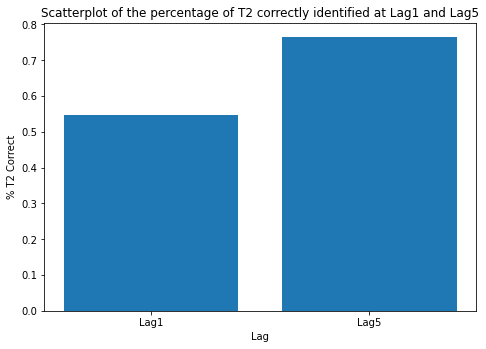

In [121]:
#use this
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T2_T1', 'Lag5_T1P_T2P_T2_T1']
ax.bar(section,ColumnMeans[CorMem])
plt.xlabel('Lag')
plt.ylabel('% T2 Correct')
plt.title('Scatterplot of the percentage of T2 correctly identified at Lag1 and Lag5')
plt.show()


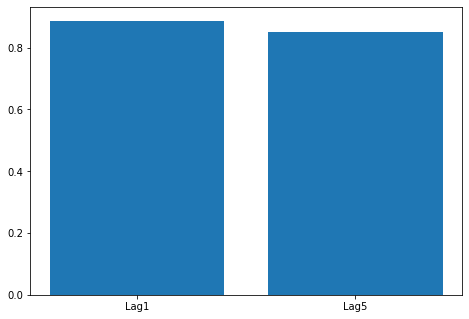

In [122]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T1', 'Lag5_T1P_T2P_T1']
ax.bar(section,ColumnMeans[CorMem])

plt.show()


KeyError: 'key of type tuple not found and not a MultiIndex'

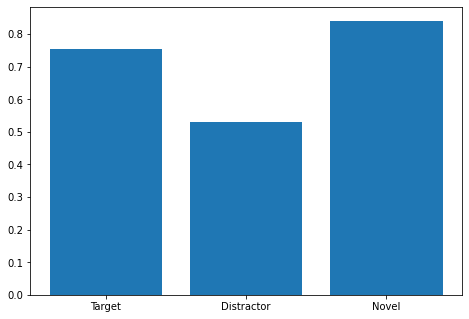

In [123]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
error = [ColumnSD['targMem', 'distracter_mem', 'novel_mem']]
plt.show()

In [ ]:
ColumnSD = df.apply(np.std)

In [ ]:
ColumnSD

In [ ]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
ci = 0.1 * np.std / np.mean
plt.show()

(array([ 2.,  2.,  4.,  5.,  8.,  2., 12.,  7.,  4.,  2.]),
 array([0.60714286, 0.63928571, 0.67142857, 0.70357143, 0.73571429,
        0.76785714, 0.8       , 0.83214286, 0.86428571, 0.89642857,
        0.92857143]),
 <BarContainer object of 10 artists>)

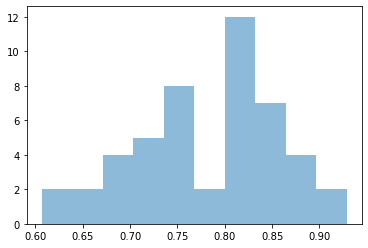

In [132]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag1_T1P_T2A_T1'], alpha=0.5)



(array([ 2.,  1.,  2.,  3.,  3., 15.,  4.,  9.,  5.,  4.]),
 array([0.46428571, 0.50714286, 0.55      , 0.59285714, 0.63571429,
        0.67857143, 0.72142857, 0.76428571, 0.80714286, 0.85      ,
        0.89285714]),
 <BarContainer object of 10 artists>)

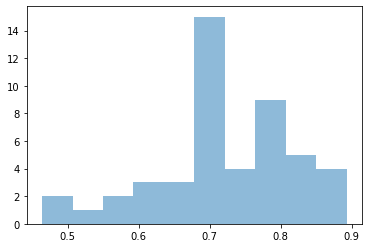

In [133]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1P_T2A_T1'], alpha=0.5)

(array([ 1.,  0.,  2.,  5.,  3.,  4.,  7., 10.,  9.,  7.]),
 array([0.73529412, 0.75522876, 0.7751634 , 0.79509804, 0.81503268,
        0.83496732, 0.85490196, 0.8748366 , 0.89477124, 0.91470588,
        0.93464052]),
 <BarContainer object of 10 artists>)

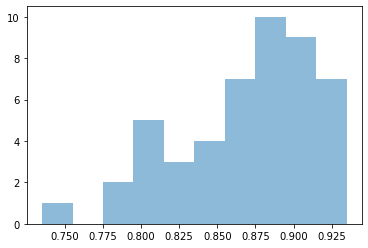

In [134]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['ABT1overall'], alpha=0.5)

(array([ 1.,  0.,  6.,  3.,  7.,  6.,  6., 12.,  4.,  3.]),
 array([0.47712418, 0.51633987, 0.55555556, 0.59477124, 0.63398693,
        0.67320261, 0.7124183 , 0.75163399, 0.79084967, 0.83006536,
        0.86928105]),
 <BarContainer object of 10 artists>)

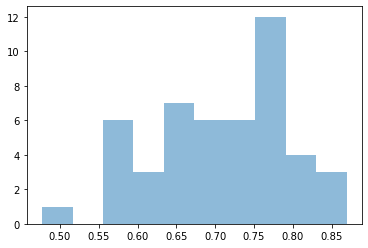

In [126]:
#DON'T NEED TO USE
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['ABT2overall'], alpha=0.5)

(array([1., 2., 0., 7., 6., 5., 4., 8., 8., 7.]),
 array([0.44186047, 0.49069767, 0.53953488, 0.58837209, 0.6372093 ,
        0.68604651, 0.73488372, 0.78372093, 0.83255814, 0.88139535,
        0.93023256]),
 <BarContainer object of 10 artists>)

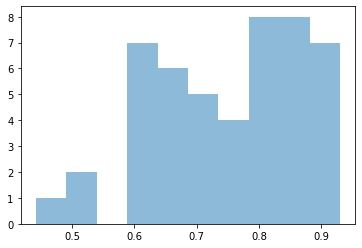

In [135]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1P_T2P_T2'], alpha=0.5)

(array([ 1.,  1.,  1.,  3.,  3., 10.,  2., 13.,  7.,  7.]),
 array([0.17241379, 0.24137931, 0.31034483, 0.37931034, 0.44827586,
        0.51724138, 0.5862069 , 0.65517241, 0.72413793, 0.79310345,
        0.86206897]),
 <BarContainer object of 10 artists>)

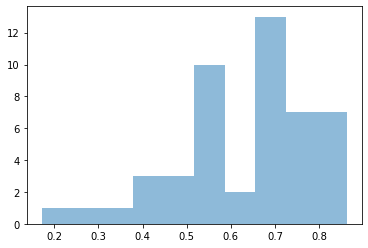

In [136]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1A_T2P_T2'], alpha=0.5)

In [129]:
df['novel_mem'].values

array([0.88648649, 0.91351351, 0.80540541, 0.90810811, 0.95675676,
       0.72432432, 0.87567568, 0.9027027 , 0.84864865, 0.96756757,
       0.87567568, 0.75135135, 0.76216216, 0.88108108, 0.85405405,
       0.85405405, 0.81081081, 0.98918919, 0.87567568, 0.8972973 ,
       0.93513514, 0.8972973 , 0.94054054, 0.9027027 , 0.74054054,
       0.63783784, 0.87567568, 0.40540541, 0.92432432, 0.75675676,
       0.94054054, 0.88108108, 0.61621622, 0.70810811, 0.96756757,
       0.8       , 0.95675676, 0.95135135, 0.77837838, 0.65945946,
       0.93513514, 0.92432432, 0.81081081, 0.81081081, 0.78378378,
       0.9027027 , 0.76756757, 0.83243243])

(array([ 1.,  0.,  0.,  2.,  1.,  4., 10.,  4., 16., 10.]),
 array([0.40540541, 0.46378378, 0.52216216, 0.58054054, 0.63891892,
        0.6972973 , 0.75567568, 0.81405405, 0.87243243, 0.93081081,
        0.98918919]),
 <BarContainer object of 10 artists>)

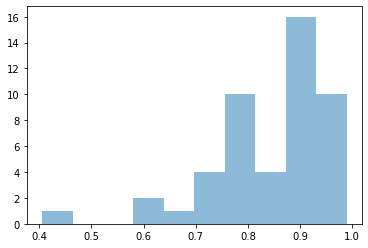

In [137]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['novel_mem'], alpha=0.5)

(array([ 1.,  0.,  0.,  1.,  2.,  0., 10., 12., 15.,  7.]),
 array([0.35051546, 0.40401611, 0.45751675, 0.51101739, 0.56451803,
        0.61801867, 0.67151932, 0.72501996, 0.7785206 , 0.83202124,
        0.88552189]),
 <BarContainer object of 10 artists>)

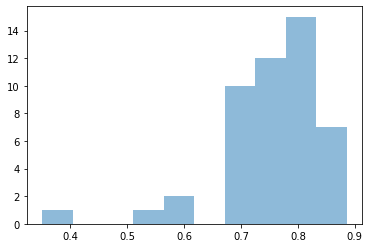

In [138]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['targMem'], alpha=0.5)